## Histogram of Oriented Gradients

##### Dt : 11-10-2023

Eventhough I did not understand everything described in the research paper, I tried to implement the subtle things I've learnt in the paper.

The medium blog that eases the implementation of the algorithm is given in the link below :

[HOG_Algorithm towardsdatascience](https://towardsdatascience.com/hog-histogram-of-oriented-gradients-67ecd887675f)

In [461]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')


def show(img):
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    plt.show()
    
    
def generate_gradient(img : np.ndarray):
    magnitudes = np.zeros((img.shape[0]-2, img.shape[1]-2))
    directions =  np.zeros((img.shape[0]-2, img.shape[1]-2))
    for i in range(1,magnitudes.shape[0]):
        for j in range(1, magnitudes.shape[1]):
            Gx = img[i,j] - img[i+2,j]
            Gy = img[i,j] - img[i,j+2]
            magnitudes[i-1,j-1] = np.sqrt(Gx**2 + Gy**2)
            directions[i-1,j-1] = np.abs(np.arctan(Gy/Gx)*180/np.pi)
            if Gx == 0:
                directions[i-1,j-1] = 0
    return magnitudes,directions    

In [462]:
img_path = './Test_Image_For_HOG.jpg'

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
type(img)

numpy.ndarray

In [463]:
img.shape


img = img[:700,:]

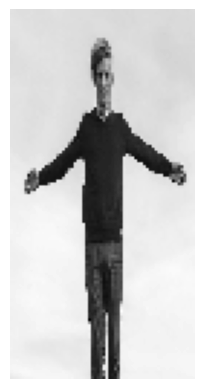

In [464]:
img = cv2.resize(img, (64,128), cv2.INTER_AREA)

show(img)

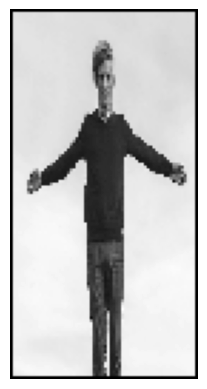

In [465]:
padded_img = np.pad(img, 1, mode='constant', constant_values=0)
show(padded_img)

In [466]:
img = padded_img.copy()    

In [467]:
magnitudes, directions = generate_gradient(img)

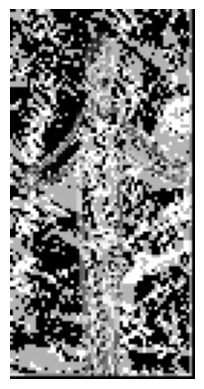

In [468]:
show(magnitudes)

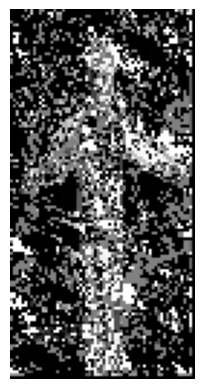

In [469]:
show(directions)

In [470]:
num_bins = 9
step_size = 180

def calculate_j(angle):
    temp = angle/step_size - 0.5
    return np.floor(temp)

def calculate_Cj(j):
    return np.round(step_size*(j+0.5), 5)

def calculate_value_j(magnitudes, directions, j ):
    Cj = calculate_Cj(j+1)
    Vj = magnitudes*((Cj-directions)/step_size)
    return int(Vj)

In [471]:
histogram_points_nine = []
for i in range(0, 128, 8):
  temp = []
  for j in range(0, 64, 8):
    magnitude_values = [[magnitudes[i][x] for x in range(j, j+8)] for i in range(i,i+8)]
    angle_values = [[directions[i][x] for x in range(j, j+8)] for i in range(i, i+8)]
    for k in range(len(magnitude_values)):
      for l in range(len(magnitude_values[0])):
        bins = [0.0 for _ in range(num_bins)]
        value_j = calculate_j(angle_values[k][l])
        
        Vj = calculate_value_j(magnitude_values[k][l], angle_values[k][l], value_j)
        Vj_1 = magnitude_values[k][l] - Vj
        bins[int(value_j)]+=Vj
        bins[int(value_j)+1]+=Vj_1
        bins = [round(x, 9) for x in bins]
    temp.append(bins)
  histogram_points_nine.append(temp)

In [472]:
epsilon = 1e-05

feature_vectors = []
for i in range(0, len(histogram_points_nine) - 1, 1):
  temp = []
  for j in range(0, len(histogram_points_nine[0]) - 1, 1):
    values = [[histogram_points_nine[i][x] for x in range(j, j+2)] for i in range(i, i+2)]
    final_vector = []
    for k in values:
      for l in k:
        for m in l:
          final_vector.append(m)
    k = round(math.sqrt(sum([pow(x, 2) for x in final_vector])), 9)
    final_vector = [round(x/(k + epsilon), 9) for x in final_vector]
    temp.append(final_vector)
  feature_vectors.append(temp)

In [473]:
features  = np.array(feature_vectors)
features.shape

(15, 7, 36)

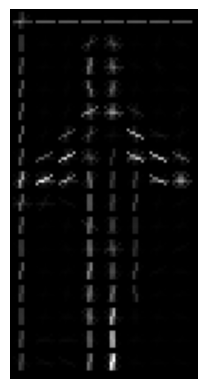

In [474]:
from skimage.feature import hog

fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True)

show(hog_image)